In [1]:

# Cell 2: Import Kalman_General
from Code_for_the_files.Kalman_General import *



In [2]:
# Define network and initialize parameters
c1 = 10
c2 = 10
c3 = 0.5
c4 = 0
c5 = 0.5
k1 = 1000
k2 = 1
k3 = 1000
k4 = 0.04

Omega = 10

c1_tilde = c1 / Omega
c2_tilde = c2 / Omega
c3_tilde = c3 * Omega
c4_tilde = c4 / Omega
c5_tilde = c5
k1_tilde = k1 / Omega
k2_tilde = k2 / Omega
k3_tilde = k3 / Omega
k4_tilde = k4

T = 1

z10 = 0
z20 = 0
x10 = 0

print(f'Omega: {Omega}, c1_tilde: {c1_tilde}, c2_tilde: {c2_tilde}, c3_tilde: {c3_tilde}, c4_tilde: {c4_tilde}, c5_tilde: {c5_tilde}, k1_tilde: {k1_tilde}, k2_tilde: {k2_tilde}, k3_tilde: {k3_tilde}, k4_tilde: {k4_tilde}, T: {T}, z10: {z10}, z20: {z20}, x10: {x10}')

Omega: 10, c1_tilde: 1.0, c2_tilde: 1.0, c3_tilde: 5.0, c4_tilde: 0.0, c5_tilde: 0.5, k1_tilde: 100.0, k2_tilde: 0.1, k3_tilde: 100.0, k4_tilde: 0.04, T: 1, z10: 0, z20: 0, x10: 0


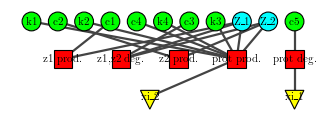

Number of subsystems: 2
-----------------------------------------------------
     xi_1  xi_2
X_1    -1     1
-----------------------------------------------------
Subsystem:  1
Involved parameters and species: ['k1', 'c2', 'k2', 'c1', 'c4', 'k4', 'c3', 'k3', 'Z_1', 'Z_2']
Unobservable reactions involved: ['z1 prod.', 'z1,z2 deg.', 'z2 prod.']
Observable reactions involved: ['prot prod.']
Xi involved: ['xi_2']
Size of state space of this subsystem: 251001
-----------------------------------------------------
Subsystem:  2
Involved parameters and species: ['c5']
Unobservable reactions involved: []
Observable reactions involved: ['prot deg.']
Xi involved: ['xi_1']
Size of state space of this subsystem: 1
-----------------------------------------------------


In [3]:
# The network structure
species_names = ['Z_1', 'Z_2', 'X_1']
stoichiometric_matrix = np.array([[1, 0, -1, 0, 0], [0, 1, -1, 0, 0], [0, 0, 0, 1, -1]])
parameters_names = ['c1', 'c2', 'c3', 'c4', 'c5', 'k1', 'k2', 'k3', 'k4']
parameter_values = {'c1': c1, 'c2': c2, 'c3': c3, 'c4': c4, 'c5': c5, 'k1': k1, 'k2': k2, 'k3': k3, 'k4': k4}
reaction_names = ['z1 prod.', 'z2 prod.', 'z1,z2 deg.', 'prot prod.', 'prot deg.']
propensities = [
    lambda c1: c1,
    lambda c2: c2,
    lambda c3, Z_1, Z_2: c3*Z_1*Z_2,
    lambda c4, k1, k2, k3, k4, Z_1, Z_2: c4+(k3*(Z_1/k1))/(k4+(Z_1/k1)+(Z_2/k2)),
    lambda c5, X_1: c5*X_1
]

observable_species = ['X_1']
range_of_species = pd.DataFrame({'min': [0, 0], 'max': [500, 500]}, index=['Z_1', 'Z_2'])

range_of_parameters = pd.DataFrame([[c1, c1], [c2, c2], [c3, c3], [c4, c4], [c5, c5], [k1, k1], [k2, k2], [k3, k3], [k4, k4]], index=parameters_names, columns=['min', 'max'])
discretization_size_parameters = pd.DataFrame([1, 1, 1, 1, 1, 1, 1, 1, 1], index=parameters_names)

CF_not_scaled = CRNForContinuousTimeFiltering(stoichiometric_matrix=stoichiometric_matrix,
                                              species_names=species_names,
                                              parameters_names=parameters_names,
                                              reaction_names=reaction_names,
                                              propensities=propensities,
                                              observable_species=observable_species,
                                              range_of_species=range_of_species,
                                              range_of_parameters=range_of_parameters,
                                              discretization_size_parameters=discretization_size_parameters)

CF_not_scaled.plot_decomposition(figsize=(5, 5))

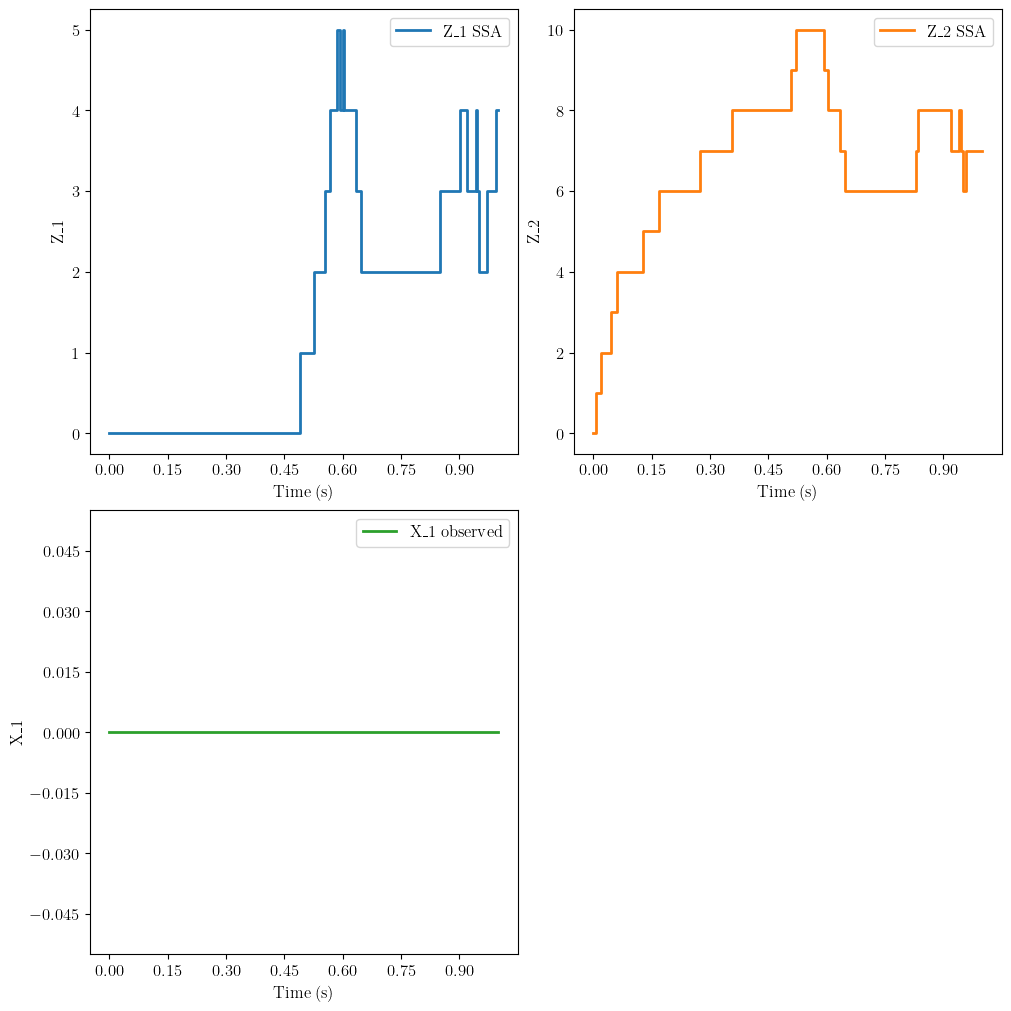

In [4]:
# Define initial conditions
initial_conditions = {'Z_1': z10, 'Z_2': z20, 'X_1': x10}  # Define initial values based on the network
# Generate a single SSA trajectory and plot hidden and observed species
species_data, observed_data, time_list, time_list_1 = generate_and_plot_ssa(CF_not_scaled, parameter_values, initial_conditions, Omega)

/Users/edambrosio/Desktop/FFSP_code_revised_2024/Non_Linear_Example_intro/Code_for_the_files/Kalman_General.py:126: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


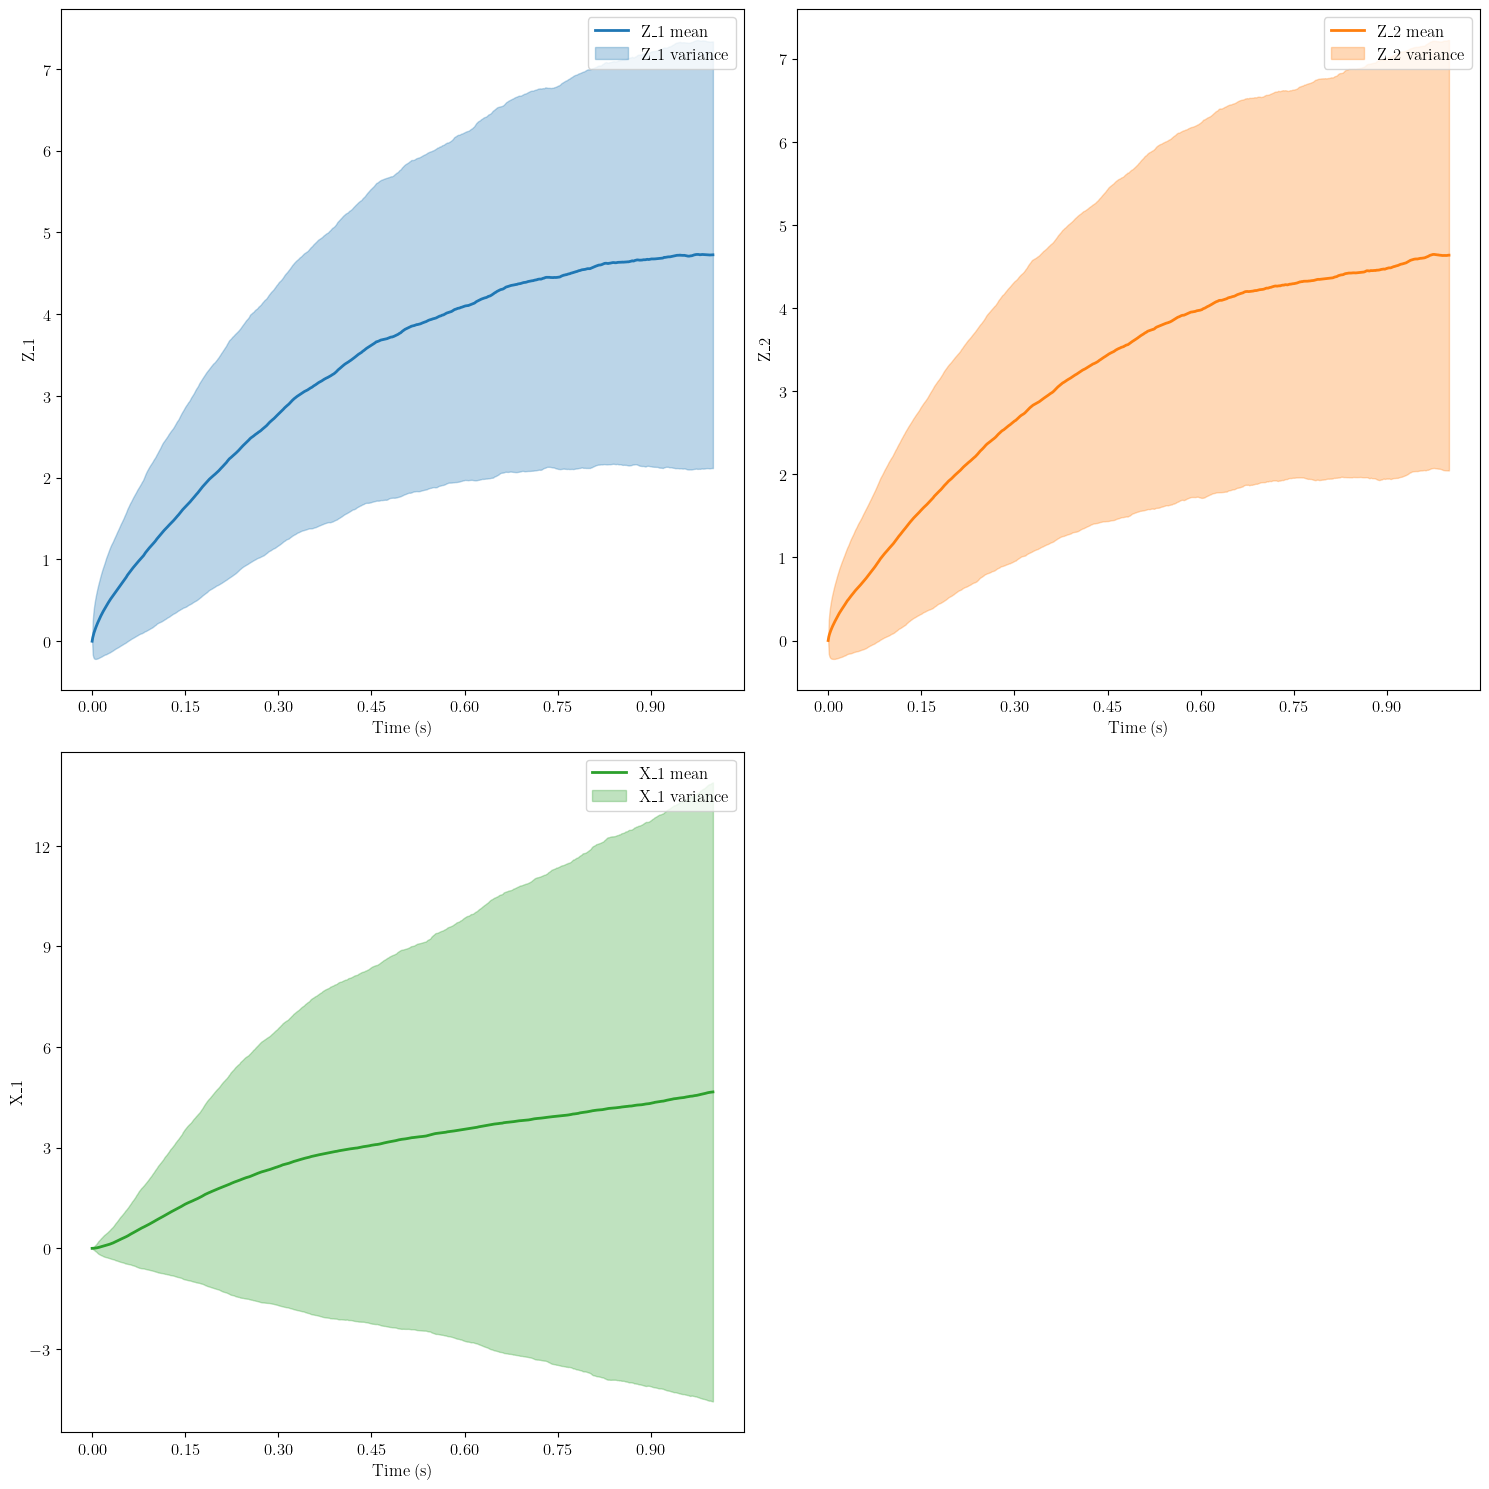

In [5]:
num_trajectories = 1000
parameter_values = {'c1': c1, 'c2': c2, 'c3': c3, 'c4': c4, 'c5': c5, 'k1': k1, 'k2': k2, 'k3': k3, 'k4': k4}
# Generate SSA trajectories
ssa_trajectories = [CF_not_scaled.SSA_rich_data_structure({key: val * Omega for key, val in initial_conditions.items()}, parameter_values, 0, T) for _ in range(num_trajectories)]

# Compute SSA statistics
ssa_stats = compute_and_plot_statistics_SSA(CF_not_scaled, ssa_trajectories, T)

/Users/edambrosio/Desktop/FFSP_code_revised_2024/Non_Linear_Example_intro/Code_for_the_files/Kalman_General.py:190: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


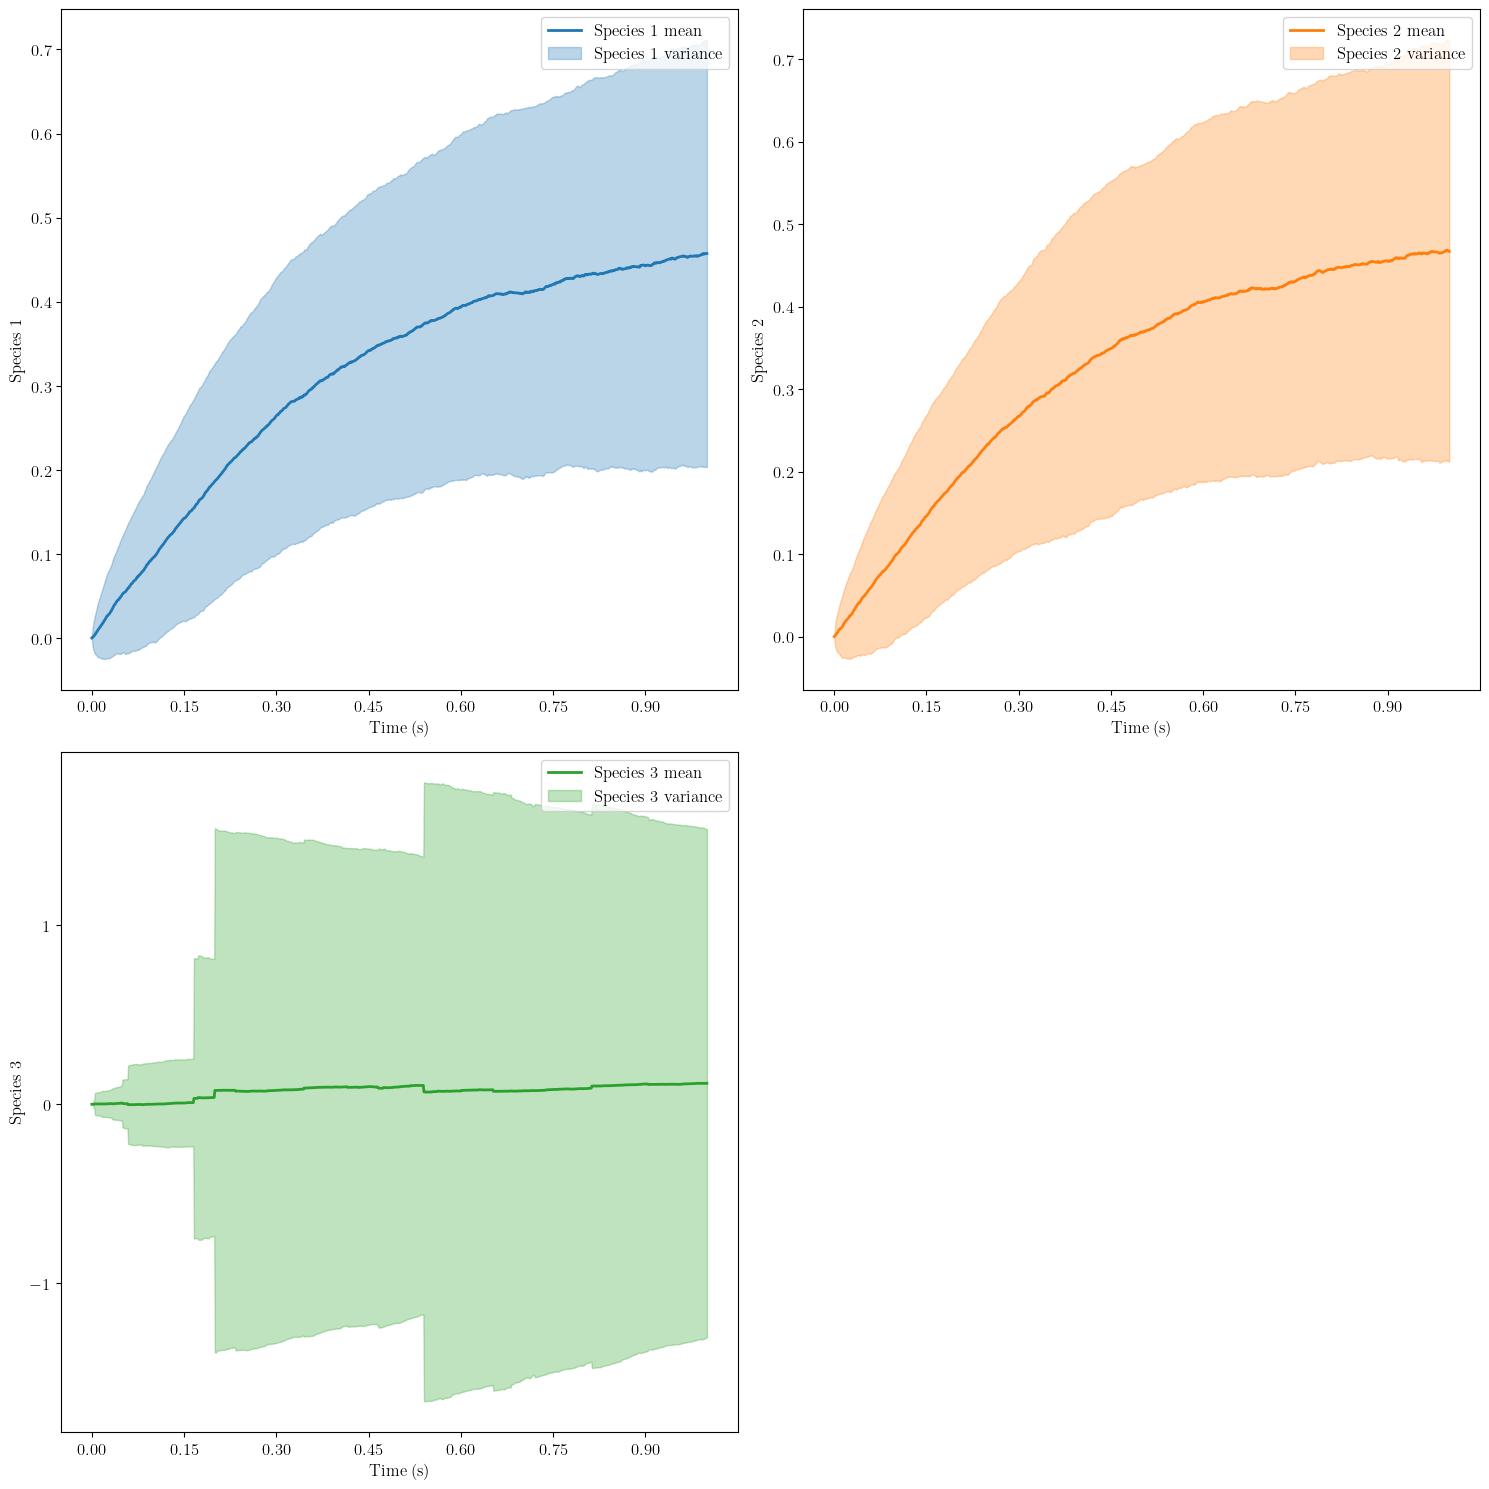

{'Z_1': {'mean': array([0.        , 0.00067475, 0.00116536, ..., 0.4571989 , 0.45707779,
         0.45726126]),
  'variance': array([0.00000000e+00, 9.94903501e-05, 1.98212588e-04, ...,
         6.41357933e-02, 6.41943055e-02, 6.45655881e-02])},
 'Z_2': {'mean': array([0.        , 0.00100904, 0.00171231, ..., 0.46764371, 0.46708884,
         0.46687427]),
  'variance': array([0.        , 0.00010117, 0.00021344, ..., 0.06487365, 0.06496381,
         0.06488542])},
 'X_1': {'mean': array([ 0.00000000e+00,  0.00000000e+00, -5.17491687e-05, ...,
          1.16714902e-01,  1.16856895e-01,  1.17588191e-01]),
  'variance': array([0.00000000e+00, 0.00000000e+00, 2.96700235e-05, ...,
         2.02615126e+00, 2.02272113e+00, 2.01963280e+00])}}

In [6]:
parameter_values = {'c1': c1_tilde, 'c2': c2_tilde, 'c3': c3_tilde, 'c4': c4_tilde, 'c5': c5_tilde, 'k1': k1_tilde, 'k2': k2_tilde, 'k3': k3_tilde, 'k4': k4_tilde}
initial_conditions = {'Z_1': z10, 'Z_2': z20, 'X_1': x10}

all_trajectories, diffusion_stats = generate_diffusion_trajectories_and_plot(num_trajectories, T, Omega, parameter_values, initial_conditions, stoichiometric_matrix, propensities)

diffusion_stats

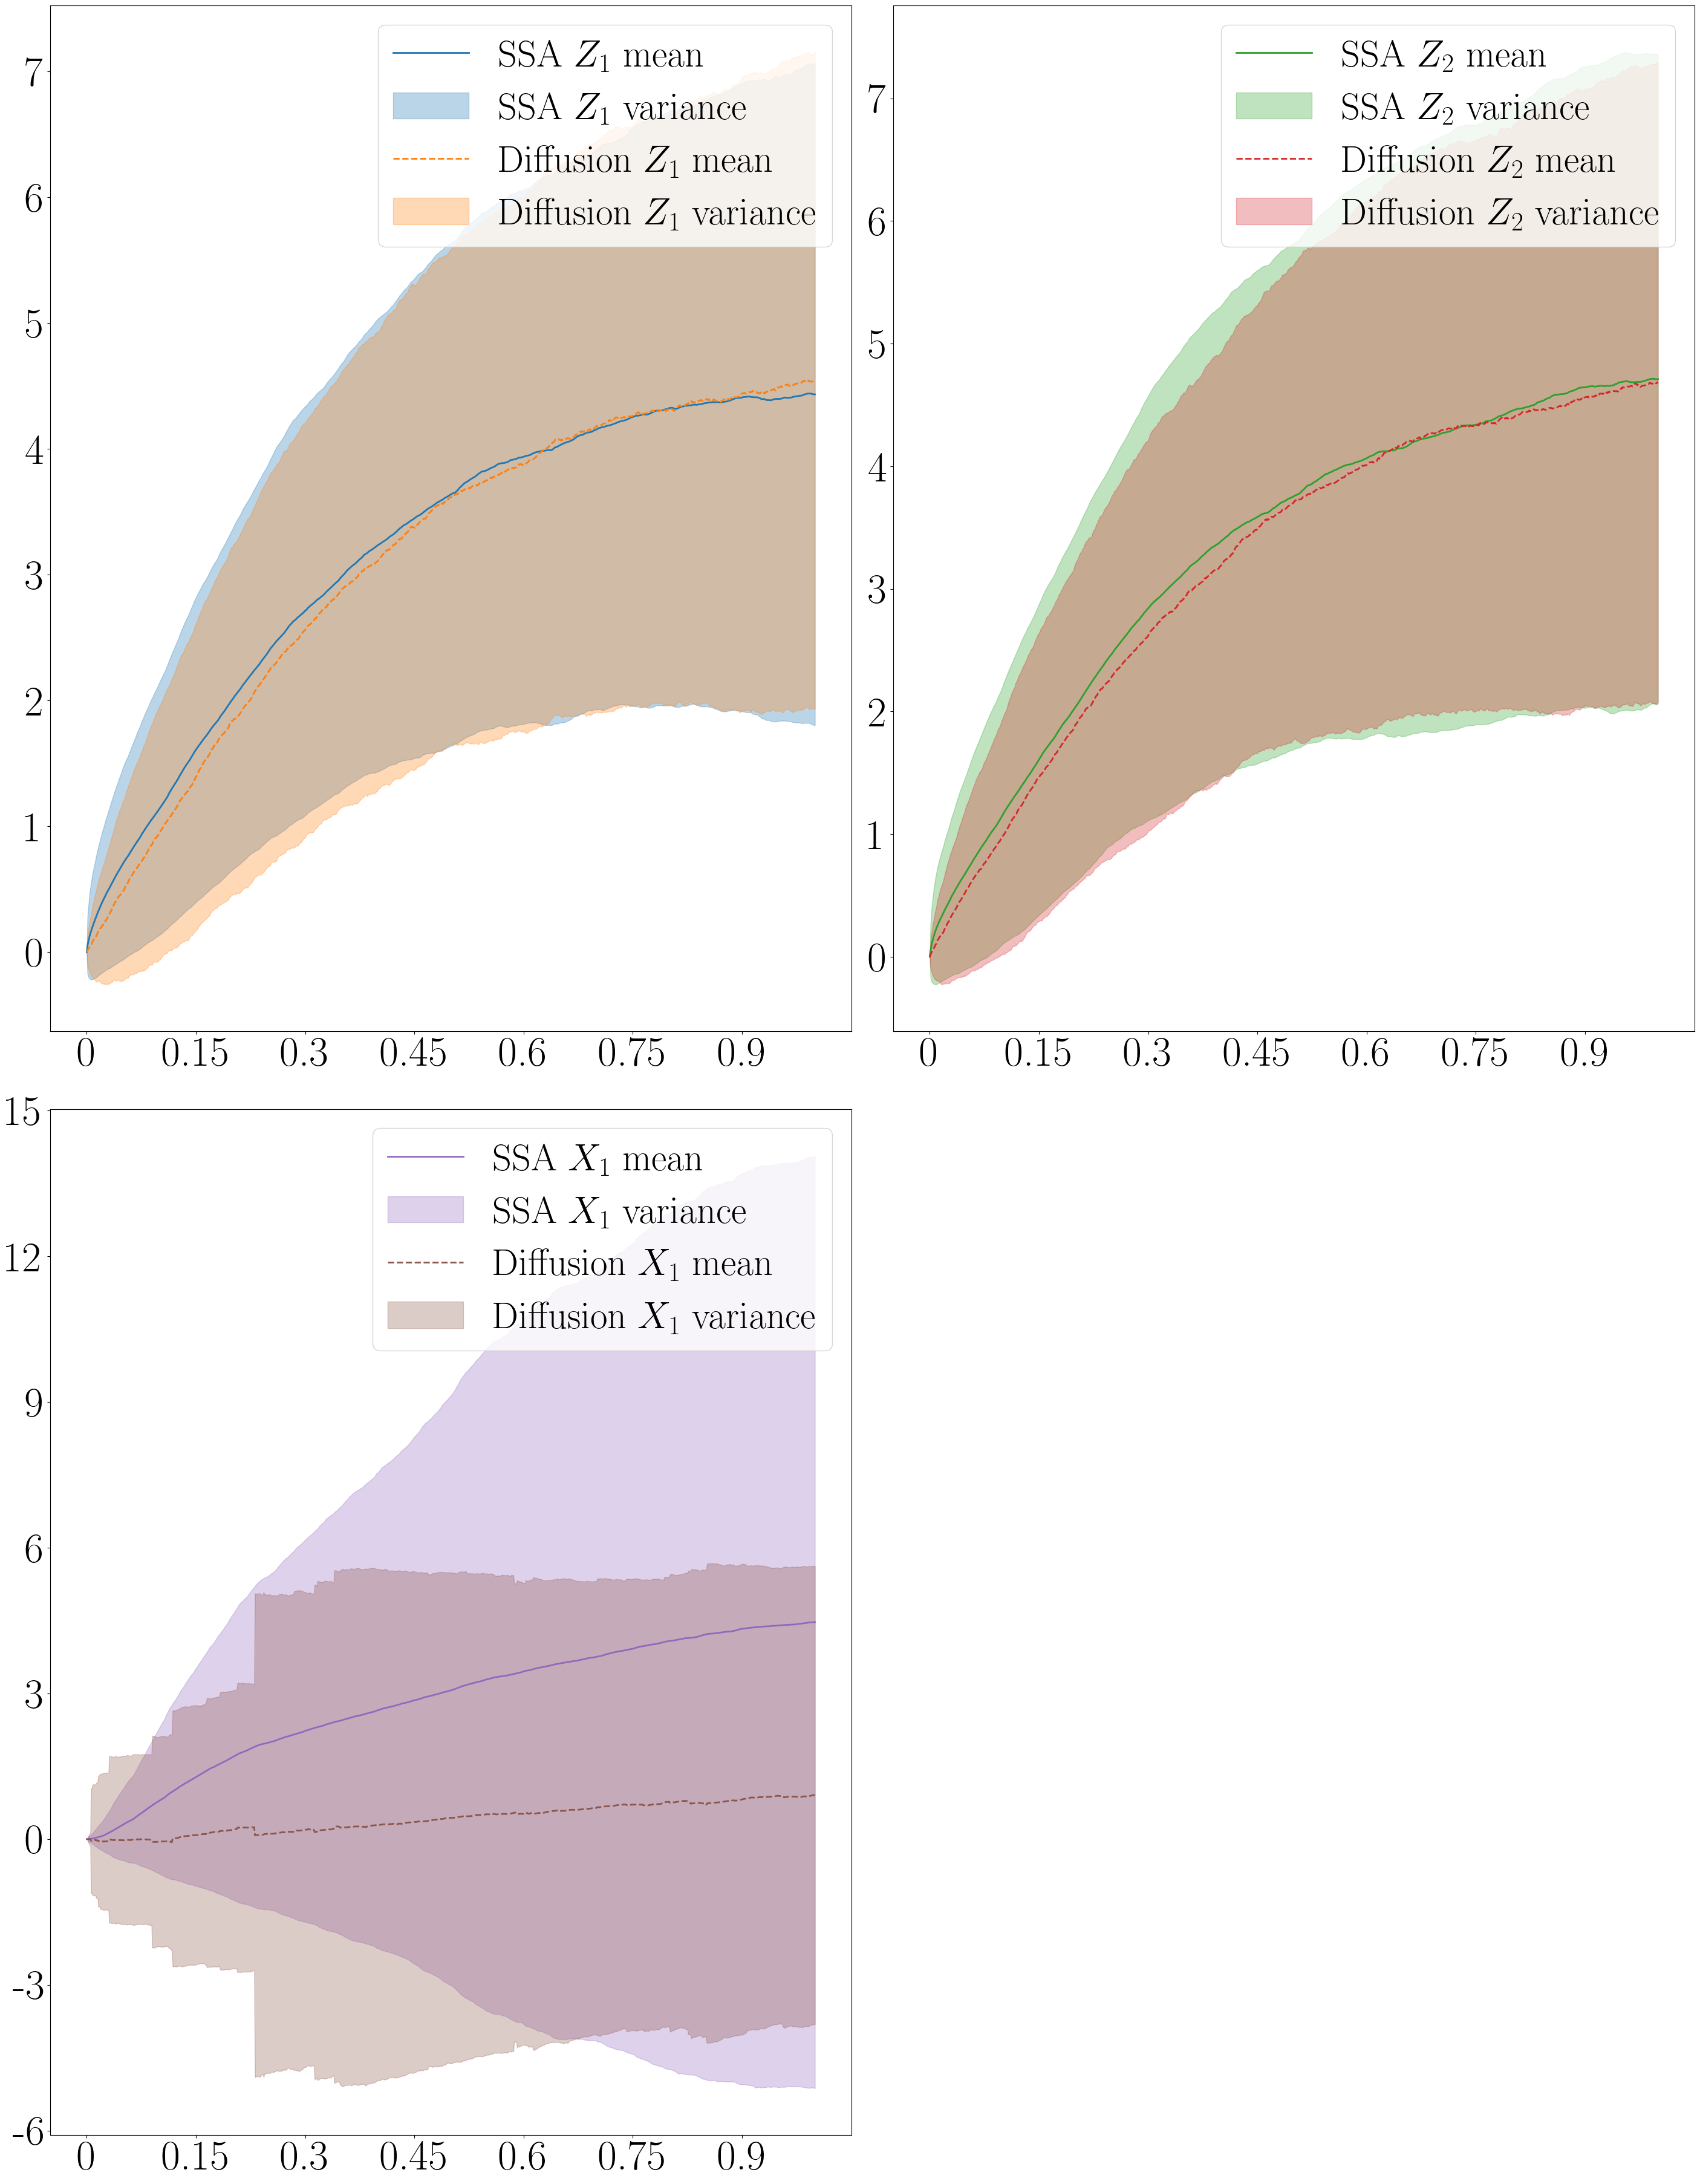

In [10]:
# Compare SSA and diffusion statistics
fig = compare_statistics(ssa_stats, diffusion_stats, list(initial_conditions.keys()), T, Omega)

In [11]:
fig.savefig('SSA_Diffusion.pdf',dpi=300)

In [24]:
def compare_statistics(ssa_statistics, diffusion_statistics, species_names, T, Omega):
    common_time_points = np.linspace(0, T, 1001)
    n_species = len(species_names)
    ncols = 2
    nrows = (n_species + ncols - 1) // ncols
    fig, axes = plt.subplots(nrows, ncols, figsize=(28, nrows * 18), constrained_layout=True)
    axes = np.atleast_1d(axes).flatten()
    colors = plt.get_cmap('tab10').colors

    for idx, species in enumerate(species_names):
        ax = axes[idx]
        ssa_mean = ssa_statistics[species]['mean']
        ssa_variance = ssa_statistics[species]['variance']
        diffusion_mean = diffusion_statistics[species]['mean'] * Omega
        diffusion_variance = diffusion_statistics[species]['variance'] * (Omega ** 2)

        ax.plot(common_time_points, ssa_mean, label=f'SSA {species} mean', linewidth=2,
                color=colors[2 * idx % len(colors)])
        ax.fill_between(common_time_points, ssa_mean - np.sqrt(ssa_variance), ssa_mean + np.sqrt(ssa_variance),
                        color=colors[2 * idx % len(colors)], alpha=0.3, label=f'SSA {species} variance')

        ax.plot(common_time_points, diffusion_mean, label=f'Diffusion {species} mean', linewidth=2, linestyle='--',
                color=colors[(2 * idx + 1) % len(colors)])
        ax.fill_between(common_time_points, diffusion_mean - np.sqrt(diffusion_variance),
                        diffusion_mean + np.sqrt(diffusion_variance), color=colors[(2 * idx + 1) % len(colors)],
                        alpha=0.3, label=f'Diffusion {species} variance')

        ax.legend(fontsize=32)
        ax.xaxis.set_major_locator(MaxNLocator(nbins=10, prune='both'))
        ax.yaxis.set_major_locator(MaxNLocator(integer=True, prune='both'))
        ax.tick_params(axis='both', which='major', labelsize=32)
        ax.set_xlabel("Time (s)", fontsize=32)
        ax.set_ylabel(species, fontsize=32)
        ax.set_aspect('auto')

    for ax in axes[n_species:]:
        fig.delaxes(ax)

    plt.show()

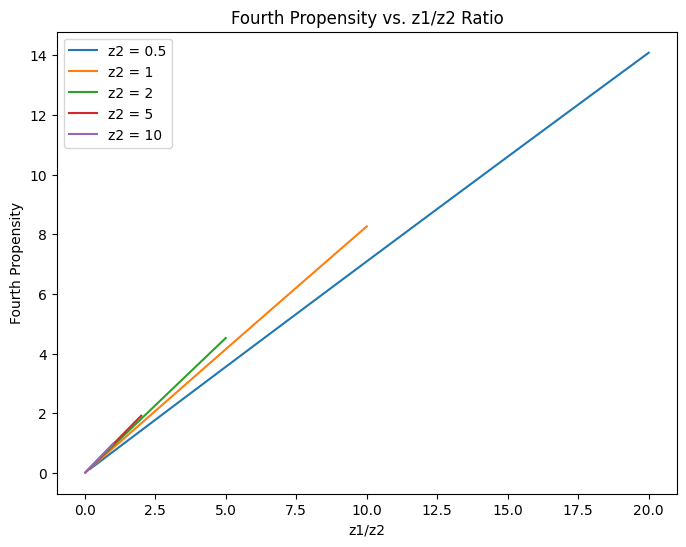

In [22]:
#way to check that the fourth propensity is proportional to z1/z2

# Parameters
c4 = 0
k1 = 1000
k2 = 1
k3 = 1000
k4 = 0.2

# Define the propensity function
def fourth_propensity(z1, z2, c4, k1, k2, k3, k4):
    return c4 + (k3 * (z1 / k1)) / (k4 + (z1 / k1) + (z2 / k2))

# Generate values for z1
z1_vals = np.linspace(0.1, 10, 100)
z2_vals = [0.5, 1, 2, 5, 10]  # Fixed values for z2

# Plot the propensity values against z1/z2 ratio for each fixed z2
plt.figure(figsize=(8, 6))

for z2 in z2_vals:
    ratios = z1_vals / z2
    propensity_vals = fourth_propensity(z1_vals, z2, c4, k1, k2, k3, k4)
    plt.plot(ratios, propensity_vals, label=f'z2 = {z2}')

plt.xlabel('z1/z2')
plt.ylabel('Fourth Propensity')
plt.title('Fourth Propensity vs. z1/z2 Ratio')
plt.legend()
plt.show()


In [7]:
# Save to .mat files
scipy.io.savemat('ssa_stats.mat', ssa_stats)
scipy.io.savemat('diffusion_stats.mat', diffusion_stats)